In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelBinarizer
from scipy import interp
import seaborn as sns
from sklearn.metrics import classification_report

from sklearn.model_selection import StratifiedKFold, GridSearchCV,train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.cluster import DBSCAN

from sklearn.ensemble import RandomForestClassifier

from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
root='/content/drive/My Drive/data.csv'
df=pd.read_csv(root)

In [ ]:
lb = LabelBinarizer()
df['diagnosis'] = lb.fit_transform(df['diagnosis'].values)
y=df['diagnosis']
targets=df['diagnosis']
df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1, inplace=True)
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
x=df
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.1,random_state=4)
feature_names = x.columns.tolist()
clf=RandomForestClassifier()
cv = StratifiedKFold(n_splits=10,shuffle=False)

In [ ]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=clf.predict(x_test)

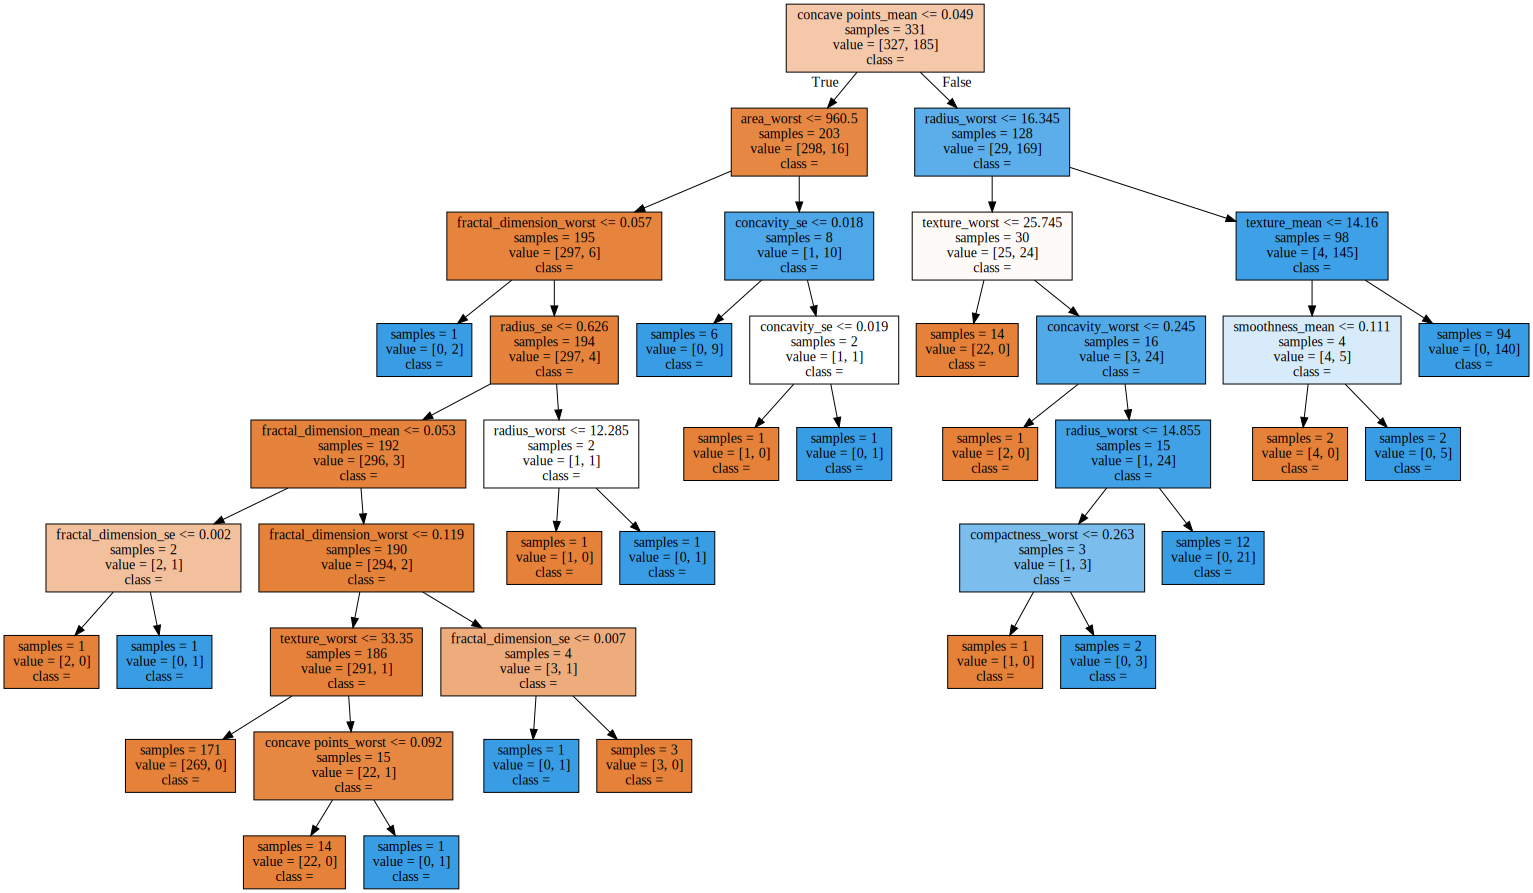

In [ ]:
from sklearn.tree import export_graphviz
#100개의 모델들 중 하나
estimator=clf.estimators_[0]
export_graphviz(estimator, out_file="tree.dot", class_names=["양성", "악성"],
                feature_names=feature_names,
                impurity=False, filled=True)
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

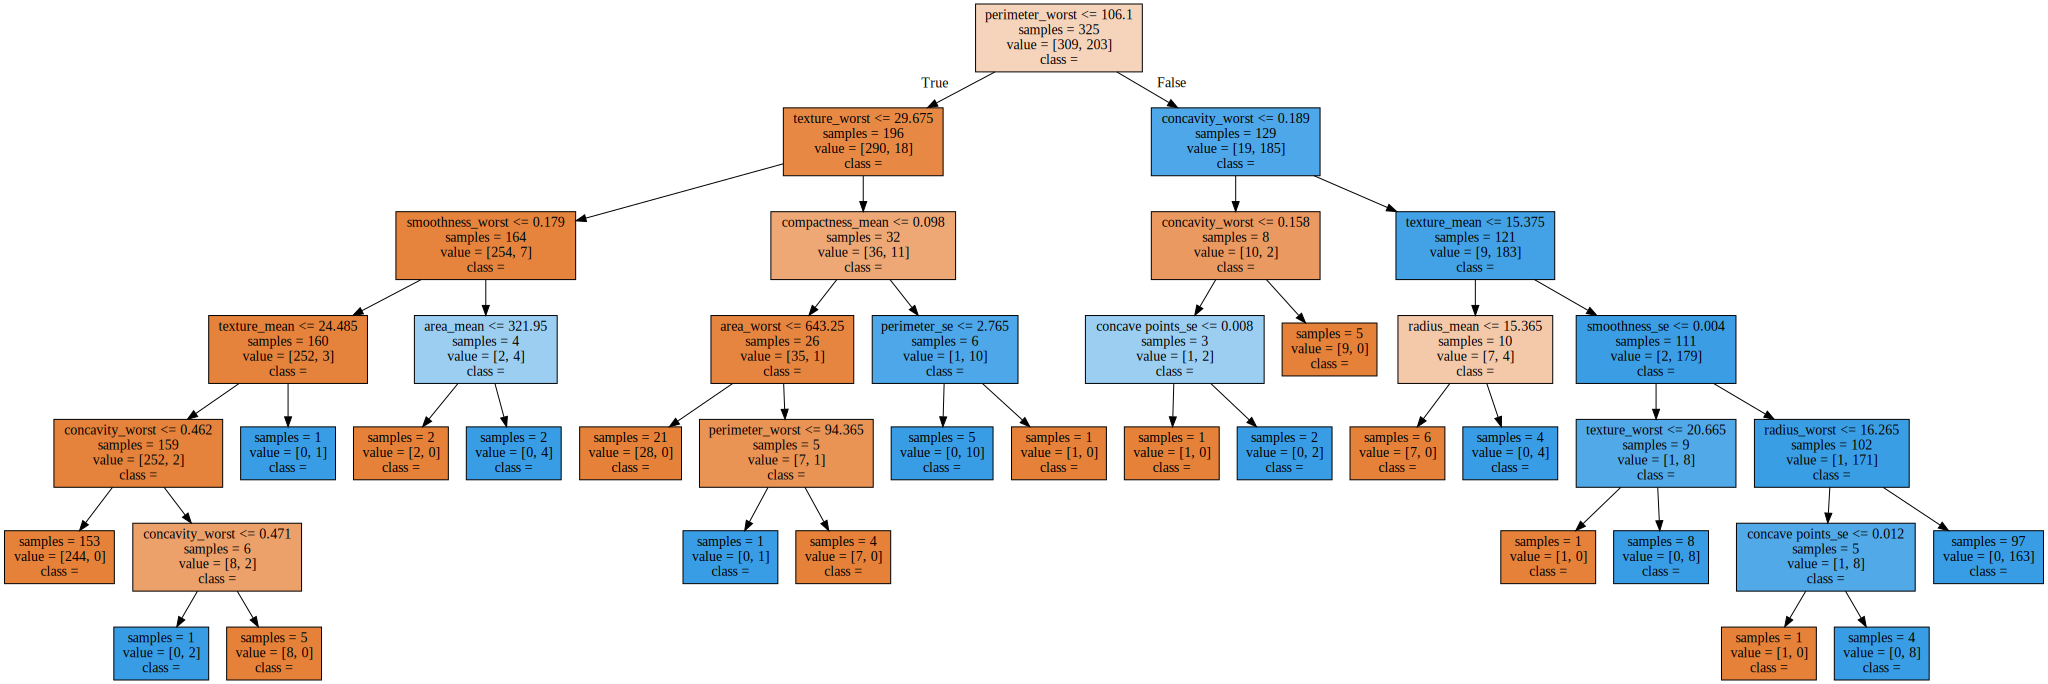

In [ ]:
from sklearn.tree import export_graphviz
#100개의 모델들 중 하나
estimator=clf.estimators_[99]
export_graphviz(estimator, out_file="tree.dot", class_names=["양성", "악성"],
                feature_names=feature_names,
                impurity=False, filled=True)
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
feature_imp = clf.fit(x_train,y_train).feature_importances_
print('특성 중요도 : \n{}'.format(feature_imp))
data = pd.DataFrame(data=feature_imp,index=x_train.columns, columns=["score"]).sort_values(by = "score", ascending=False)
print(data[:8])

특성 중요도 : 
[0.06981892 0.01559134 0.04561147 0.04868307 0.00606661 0.01656337
 0.03906172 0.10158075 0.00278512 0.00270606 0.00855103 0.00201642
 0.01017651 0.03706077 0.00240507 0.00334656 0.00714425 0.00335832
 0.00387282 0.00369138 0.11922393 0.01621181 0.13742981 0.07779522
 0.0155621  0.014908   0.03065682 0.13954289 0.00814019 0.01043768]
                         score
concave points_worst  0.139543
perimeter_worst       0.137430
radius_worst          0.119224
concave points_mean   0.101581
area_worst            0.077795
radius_mean           0.069819
area_mean             0.048683
perimeter_mean        0.045611


In [ ]:
c_mat=confusion_matrix(y_test,y_pred)
print(c_mat)

[[34  2]
 [ 3 18]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        36
           1       0.90      0.86      0.88        21

    accuracy                           0.91        57
   macro avg       0.91      0.90      0.90        57
weighted avg       0.91      0.91      0.91        57



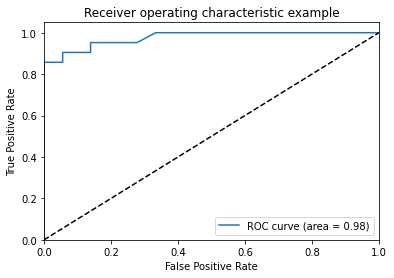

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict_proba(x_test)[:,1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy_score(y_test,clf.predict(x_test))

0.9298245614035088

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(clf, df, targets, cv=cv)
print(cvs)
mean_acc=np.mean(cvs)
mean_acc

[0.98245614 0.9122807  0.92982456 0.96491228 0.98245614 0.98245614
 0.96491228 0.98245614 0.96491228 1.        ]


0.9666666666666668

0.9824561403508771
[[34  1]
 [ 0 22]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.96      1.00      0.98        22

    accuracy                           0.98        57
   macro avg       0.98      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57

[0.0462703  0.01451779 0.03063963 0.04518056 0.0115591  0.00808739
 0.05416482 0.09799948 0.00252184 0.00303888 0.01394284 0.00273719
 0.0059978  0.0524063  0.00384797 0.00455328 0.00818741 0.006961
 0.00352756 0.00416407 0.11688944 0.01341189 0.12470492 0.13229264
 0.01481642 0.0147397  0.03383977 0.11367961 0.01198588 0.00333454]
                         score
area_worst            0.132293
perimeter_worst       0.124705
radius_worst          0.116889
concave points_worst  0.113680
concave points_mean   0.097999
concavity_mean        0.054165
area_se               0.052406
radius_mean           0.046270


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


0.9122807017543859
[[34  1]
 [ 4 18]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        35
           1       0.95      0.82      0.88        22

    accuracy                           0.91        57
   macro avg       0.92      0.89      0.90        57
weighted avg       0.92      0.91      0.91        57

[0.0491236  0.0097011  0.07418749 0.06477326 0.00467598 0.0168603
 0.03926932 0.1173365  0.00383159 0.00409016 0.00596019 0.00457378
 0.00814368 0.01675328 0.0039934  0.00465129 0.00246223 0.00477216
 0.00252278 0.00322823 0.14404011 0.01816885 0.10845376 0.09014434
 0.01209059 0.00931013 0.03365566 0.12904906 0.00666437 0.0075128 ]
                         score
radius_worst          0.144040
concave points_worst  0.129049
concave points_mean   0.117336
perimeter_worst       0.108454
area_worst            0.090144
perimeter_mean        0.074187
area_mean             0.064773
radius_mean           0.049124


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


0.9298245614035088
[[35  1]
 [ 3 18]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.95      0.86      0.90        21

    accuracy                           0.93        57
   macro avg       0.93      0.91      0.92        57
weighted avg       0.93      0.93      0.93        57

[0.0249204  0.01164537 0.06036103 0.11194848 0.00924941 0.0036441
 0.05397192 0.06580765 0.00431333 0.0050903  0.00911823 0.00440903
 0.0094368  0.03062702 0.00358675 0.00377491 0.00766075 0.00343331
 0.00340211 0.00565016 0.11160815 0.01837062 0.08267751 0.12411261
 0.01242025 0.01649576 0.05500229 0.12662187 0.01557763 0.00506224]
                         score
concave points_worst  0.126622
area_worst            0.124113
area_mean             0.111948
radius_worst          0.111608
perimeter_worst       0.082678
concave points_mean   0.065808
perimeter_mean        0.060361
concavity_worst       0.055002


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


0.9473684210526315
[[36  0]
 [ 3 18]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        36
           1       1.00      0.86      0.92        21

    accuracy                           0.95        57
   macro avg       0.96      0.93      0.94        57
weighted avg       0.95      0.95      0.95        57

[0.03194215 0.01503127 0.03649315 0.04040058 0.00550931 0.01202922
 0.03399455 0.13426298 0.0040168  0.00406107 0.0185946  0.00457333
 0.01063734 0.03029787 0.00558407 0.0047255  0.00351366 0.00392839
 0.00400055 0.00581484 0.13145524 0.01618465 0.09780712 0.10075532
 0.01134619 0.01965476 0.03460387 0.15936597 0.01100849 0.00840713]
                         score
concave points_worst  0.159366
concave points_mean   0.134263
radius_worst          0.131455
area_worst            0.100755
perimeter_worst       0.097807
area_mean             0.040401
perimeter_mean        0.036493
concavity_worst       0.034604


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


0.9649122807017544
[[36  0]
 [ 2 19]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.90      0.95        21

    accuracy                           0.96        57
   macro avg       0.97      0.95      0.96        57
weighted avg       0.97      0.96      0.96        57

[0.04562343 0.01999578 0.03838827 0.05819371 0.00872593 0.01038286
 0.05389385 0.09693892 0.0050553  0.00299044 0.00747528 0.00312724
 0.01527264 0.03679298 0.00587837 0.00454438 0.00380774 0.00568329
 0.0051483  0.00676998 0.11017646 0.01730305 0.15683433 0.10300982
 0.01643407 0.01086323 0.01336475 0.11627743 0.01368615 0.00736202]
                         score
perimeter_worst       0.156834
concave points_worst  0.116277
radius_worst          0.110176
area_worst            0.103010
concave points_mean   0.096939
area_mean             0.058194
concavity_mean        0.053894
radius_mean           0.045623


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


0.9824561403508771
[[35  1]
 [ 0 21]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.95      1.00      0.98        21

    accuracy                           0.98        57
   macro avg       0.98      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57

[0.03866055 0.01143104 0.02647331 0.04663153 0.0083607  0.00766032
 0.08744124 0.09164022 0.00475329 0.00396207 0.01159512 0.00524397
 0.01758059 0.02768616 0.00448751 0.00400874 0.00578566 0.00869645
 0.00485671 0.00477003 0.11725554 0.01712627 0.08068152 0.13102378
 0.01143844 0.00937715 0.02899892 0.16946051 0.007472   0.00544066]
                         score
concave points_worst  0.169461
area_worst            0.131024
radius_worst          0.117256
concave points_mean   0.091640
concavity_mean        0.087441
perimeter_worst       0.080682
area_mean             0.046632
radius_mean           0.038661


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


0.9298245614035088
[[35  1]
 [ 3 18]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.95      0.86      0.90        21

    accuracy                           0.93        57
   macro avg       0.93      0.91      0.92        57
weighted avg       0.93      0.93      0.93        57

[0.03608308 0.01197198 0.03629594 0.04138937 0.00429553 0.0154182
 0.02388154 0.12920274 0.00369346 0.00170474 0.01980841 0.00475664
 0.01107647 0.02476833 0.00459972 0.00425826 0.00791775 0.00606842
 0.00411965 0.00335019 0.09754557 0.02168688 0.15322873 0.12950075
 0.01408893 0.01459241 0.01984124 0.1371545  0.01128542 0.00641515]
                         score
perimeter_worst       0.153229
concave points_worst  0.137155
area_worst            0.129501
concave points_mean   0.129203
radius_worst          0.097546
area_mean             0.041389
perimeter_mean        0.036296
radius_mean           0.036083


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


0.9824561403508771
[[36  0]
 [ 1 20]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.95      0.98        21

    accuracy                           0.98        57
   macro avg       0.99      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57

[0.02584129 0.01681065 0.04422884 0.04107074 0.00637382 0.01638597
 0.04282234 0.1035447  0.00423595 0.00311156 0.00728258 0.00381837
 0.00652533 0.03955148 0.00393679 0.00474363 0.00444217 0.00336786
 0.00395762 0.00619191 0.08529709 0.01595924 0.14717261 0.15897821
 0.01208075 0.01305016 0.02944767 0.1356787  0.00792433 0.00616765]
                         score
area_worst            0.158978
perimeter_worst       0.147173
concave points_worst  0.135679
concave points_mean   0.103545
radius_worst          0.085297
perimeter_mean        0.044229
concavity_mean        0.042822
area_mean             0.041071


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


0.9473684210526315
[[34  2]
 [ 1 20]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.91      0.95      0.93        21

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57

[0.03960199 0.01117676 0.04630049 0.02603406 0.00655732 0.01567185
 0.04013519 0.11949556 0.00336865 0.0034203  0.0051853  0.00365811
 0.00880601 0.02918803 0.00407899 0.00327944 0.0047077  0.00453874
 0.00407486 0.00395823 0.10299612 0.01510797 0.1659493  0.16519675
 0.02585979 0.01276611 0.04493174 0.06960371 0.00976434 0.00458659]
                         score
perimeter_worst       0.165949
area_worst            0.165197
concave points_mean   0.119496
radius_worst          0.102996
concave points_worst  0.069604
perimeter_mean        0.046300
concavity_worst       0.044932
concavity_mean        0.040135


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


0.9642857142857143
[[34  1]
 [ 1 20]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.95      0.95      0.95        21

    accuracy                           0.96        56
   macro avg       0.96      0.96      0.96        56
weighted avg       0.96      0.96      0.96        56

[0.0261531  0.02265616 0.07703497 0.04078858 0.00510167 0.01637854
 0.07702249 0.06807265 0.00353679 0.00339288 0.00910117 0.00610252
 0.0106795  0.04718001 0.00351948 0.00427969 0.00971872 0.00431744
 0.00335831 0.0049177  0.13762345 0.02352097 0.11135539 0.10601292
 0.01161352 0.0181117  0.03104006 0.09760427 0.01080126 0.00900407]
                         score
radius_worst          0.137623
perimeter_worst       0.111355
area_worst            0.106013
concave points_worst  0.097604
perimeter_mean        0.077035
concavity_mean        0.077022
concave points_mean   0.068073
area_se               0.047180


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


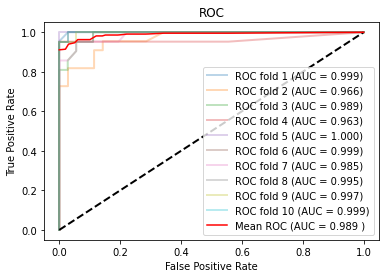

In [ ]:
tprs = []
aucs = []
ftimp=[]

mean_fpr = np.linspace(0,1,100) # 기본적으로 배열을 0에서 1사이의 값을 100등분한 것으로 채워라!
i = 1
for train,test in cv.split(df,targets):
    prob=clf.fit(df.iloc[train], targets.iloc[train]).predict_proba(df.iloc[test])[:,1] #실제 positive에 대한 prob를 구해서 prob으로 넣어줘야함...ㅠㅠ
    y_pred=clf.predict(df.iloc[test]) # k-fold를 진행할 때 마다의 y_test에 대한 prediction
    c_mat=confusion_matrix(targets[test],y_pred)
    print(accuracy_score(targets[test],y_pred))
    print(c_mat)
    print(classification_report(targets[test],y_pred))
    for k in range(len(targets[test])):
      if targets[test].iloc[k]!=y_pred[k]: 
    #여기서 ==라고 하면 예측과 실제가 맞는 것의 확률, 특성이 나오고 =!로 하면 예측과 실제가 맞지 않는 것의 확률, 특성이 나옴
        if y_pred[k] == 1 and prob[k]>0.9: #확률에 따라 출력하고 싶은 값들을 조절할 수 있다.
         print(prob[k])
         print("실제 lable : ")
         print(targets[test].iloc[k])
         print("예측 : ")
         print(y_pred[k])         
         print(df.iloc[test].iloc[k,:])
        elif y_pred[k]==0 and 1-prob[k]>0.9:
         print(1-prob[k])
         print("실제 lable : ")
         print(targets[test].iloc[k])
         print("예측 : ")
         print(y_pred[k]) 
         print(df.iloc[test].iloc[k,:])
    feature_imp = clf.fit(df.iloc[train], targets.iloc[train]).feature_importances_
    print('{}'.format(feature_imp))
    data = pd.DataFrame(data=feature_imp,index=df.iloc[train].columns, columns=["score"]).sort_values(by = "score", ascending=False)
    print(data[:8])
    fpr, tpr, t = roc_curve(targets[test],prob)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr,lw=2, alpha=0.3, label=r'ROC fold %d (AUC = %0.3f)' % (i, roc_auc))
    plt.legend(loc="lower right")
    i= i+1


plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='red',
         label=r'Mean ROC (AUC = %0.3f )' % (mean_auc),alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

plt.show()
